# **Agrupar usuarios por profesión, de Twitter de acuerdo con su personalidad , por medio de K-Means**

## Importando librerías


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (12, 5)
plt.style.use('ggplot')

## Importando los datos

Los datos para trabajar corresponde a usuarios de Twitter famosos con diferentes profesiones y caracteristicas.

In [114]:
dataframe = pd.read_csv(r'analisis.csv')

dataframe.head(10)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
5,alo_oficial,33.531771,16.183958,43.211667,25.786667,11.930417,40.1354,7
6,andresiniesta8,31.851102,13.735591,47.182362,19.594331,6.905591,91.5197,7
7,andykusnetzoff,31.865118,16.588110,55.377559,36.258346,7.464646,66.2835,5
8,andyroddick,46.393488,25.451163,39.930310,16.658062,8.452791,145.1473,7
9,andy_murray,39.436667,26.135303,32.966288,32.291591,10.956591,177.5606,7


## Visualización previa de los datos

Los datos tienen las siguientes columnas de datos:

*  usuario (el nombre en Twitter)
*  op = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
*  co = Conscientiousness – grado de orden, prolijidad, organización Elemento de la lista
*  ex = Extraversion – grado de timidez, solitario o participación ante el grupo social
*  ag = Agreeableness – grado de empatía con los demás, temperamento
*  ne = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
*  Categoria – Actividad laboral del usuario (actor, cantante, etc.)


Cada categoría es una profesión
1. Actor/actriz
2. Cantante
3. Modelo
4. Tv, series
5. Radio
6. Tecnología
7. Deportes
8. Politica
9. Escritor



In [115]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


### Cantidad de datos por categoría

In [116]:
dataframe.groupby('categoria').size()

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64

### Distribución de los datos

Se puede observar la dispersión de los datos en cada variable

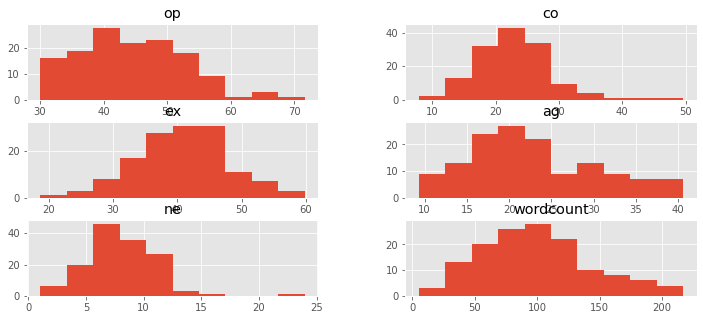

In [117]:
dataframe.drop(['categoria'], 1).hist()
plt.show()

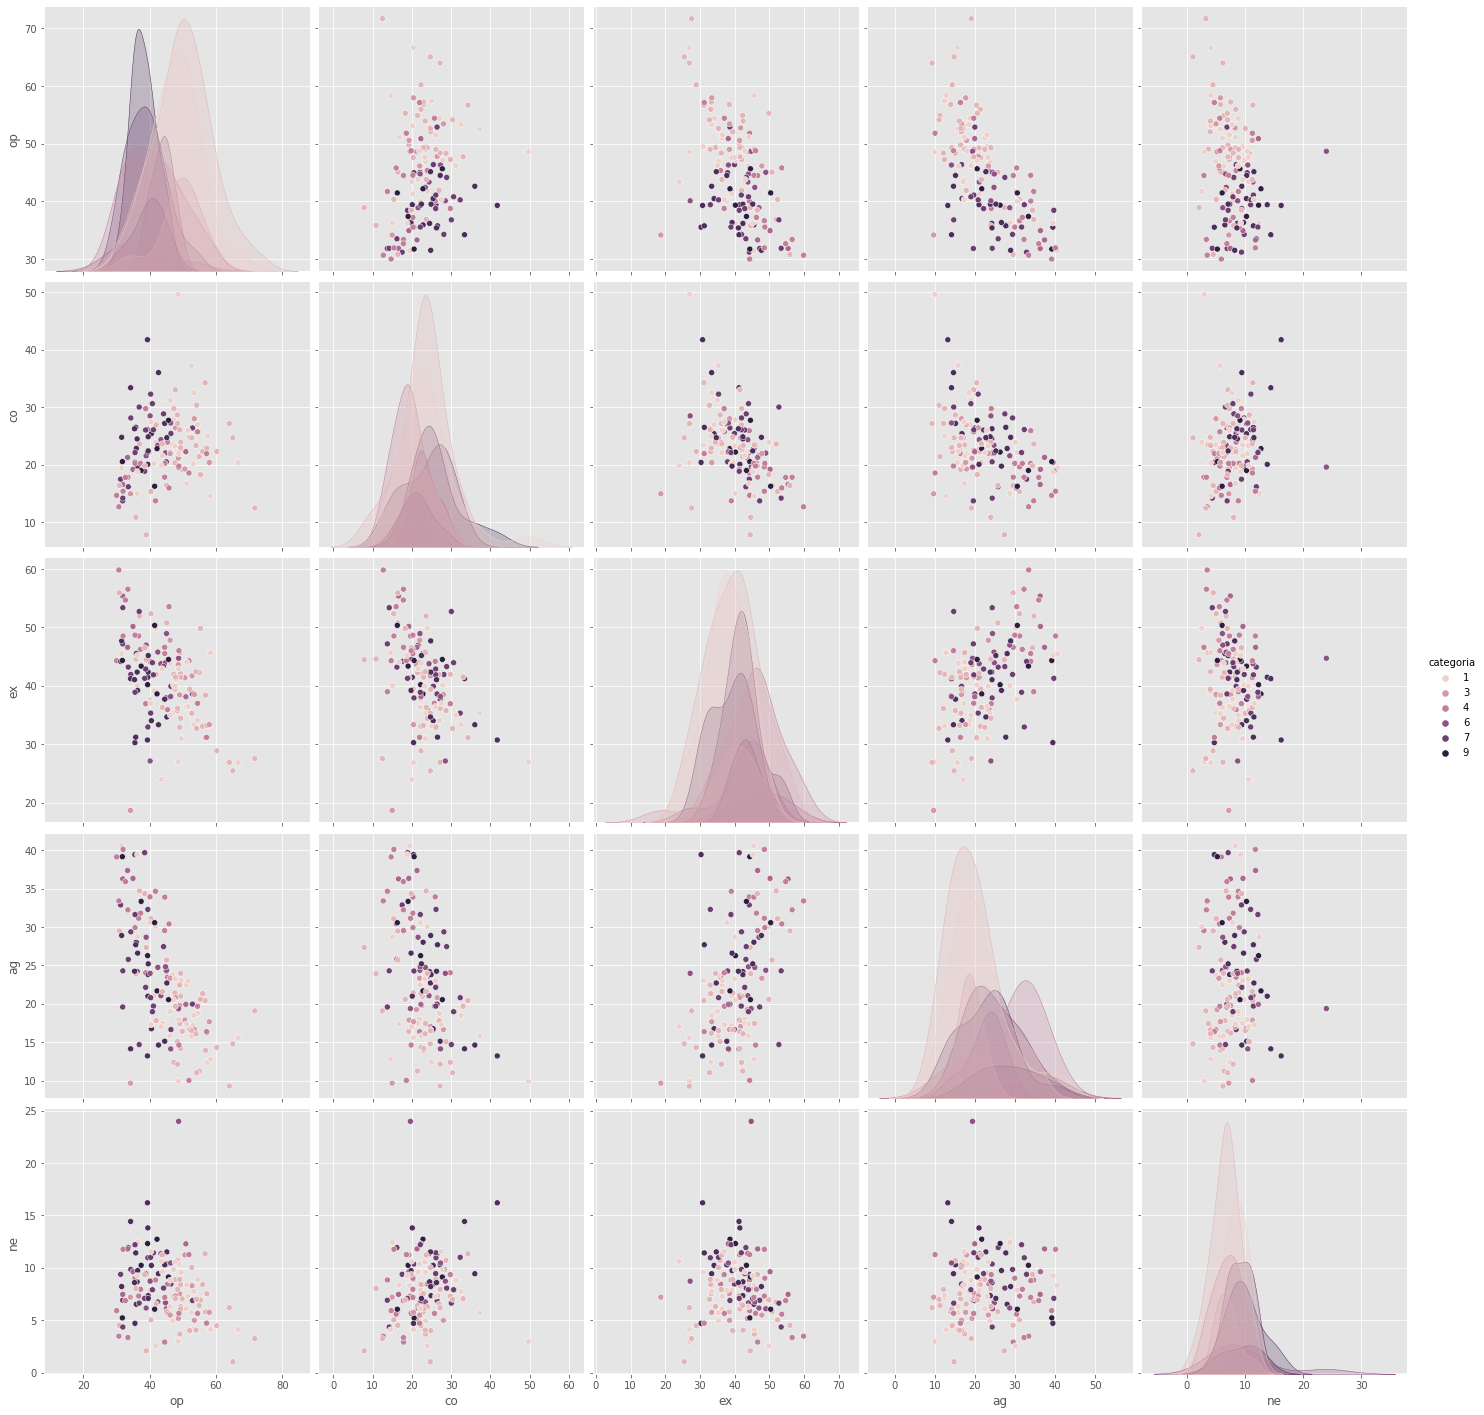

In [118]:
sns.pairplot(dataframe.dropna(), hue='categoria', height=4, vars=["op", "co", "ex", "ag", "ne"], kind='scatter')

Se seleccionan 3 variables diferentes, en este caso op (openness), ex (extraversion) y ag (agreeableness) para analizar la relación de estos datos y agruparlos basados en estas variables.

## Definiendo entradas

En la variable X sólo se cargan las variables de op (openness), ex (estraversion), y ag (agreeableness). En Y se carga la categoría que indica las profesiones de cada usuario

In [119]:
X = np.array(dataframe[["op", "ex", "ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

Se gráfican las personas segun las 3 variables en las que se van a aplicar los cluster y se colorean dependiendo de su profesión

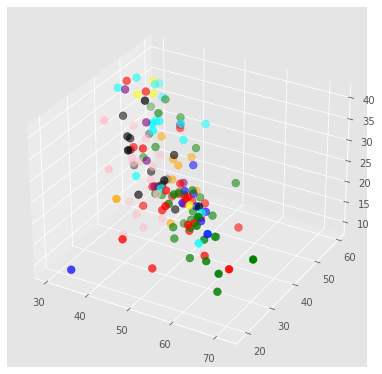

In [120]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','purple','brown']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

## Obtener el valor K

Para obtener el valor de k o número de cluster se usa una curva de codo, la cual grafica la distancia de los puntos al centroide de su cluster contra la cantidad de clusters que hay, se debe elegir el "punto de codo" o lugar donde el cambio en la distancia ya no se considera significativo.

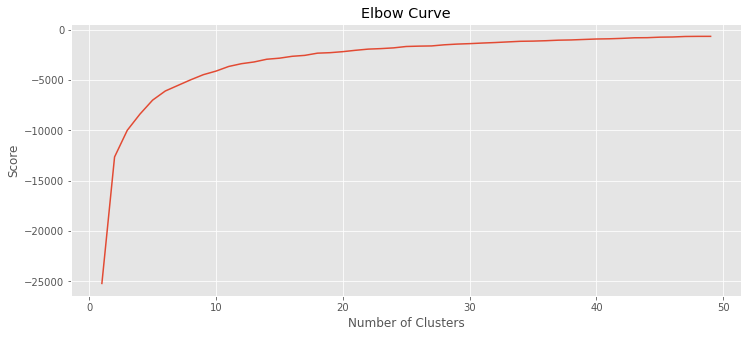

In [121]:
Nc = range(1, 50)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Para está gráfica aunque es muy suave se eligen 5 clusters

# El estadistico de Gap:

Es una forma de estandarizar la manera de hallar clusters en datos según su distribución

Acá usamos 3 parametros que son:
- data: Arreglo con la informacion
- nrefs: Numero de muestras al dataset a crear
- maxClusters: Numero maximo de clusters para testear        

In [122]:
data = X
nrefs = 10
maxClusters = 20

gaps = np.zeros((len(range(1, maxClusters)),))
resultsdf = pd.DataFrame({'clusterCount': [], 'gap': []})
for gap_index, k in enumerate(range(1, maxClusters)):
    refDisps = np.zeros(nrefs) # Holder for reference dispersion results
    # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
    for i in range(nrefs):
        np.random.seed(0)
        randomReference = np.random.random_sample(size=data.shape) # Create new random reference set
        km = KMeans(k) # Fit to it
        km.fit(randomReference)

        refDisp = km.inertia_
        refDisps[i] = refDisp
        
    km = KMeans(k) # Fit cluster to original data and create dispersion
    km.fit(data)

    origDisp = km.inertia_

    gap = np.log(np.mean(refDisps)) - np.log(origDisp) # Calculate gap statistic
    gaps[gap_index] = gap # Assign this loop's gap statistic to gaps

    resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)
# Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal
k,resultsdf = (gaps.argmax() + 1, resultsdf)

n_clusters = k
print(k)

2


Aunque el estadístico de GAP sugiere 2 clusters, se ensaya con valores cercanos y el número de clusters = 5 obtiene el mejor resultado 

## Ejecutando K-Means

Se ejecuta entonces el algoritmo para 5 clusters y se obtienen las coordenadas de sus centroides

In [195]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[42.75925435 32.7509888  21.08881555]
 [35.90241306 47.56828232 33.58748762]
 [40.14744474 43.54690971 23.11790265]
 [58.70462307 30.53566167 15.72207033]
 [50.42588653 40.66723528 17.30892462]]


Ahora se grafican los cluser por colores y se marca con una estrella el centroide de cada uno

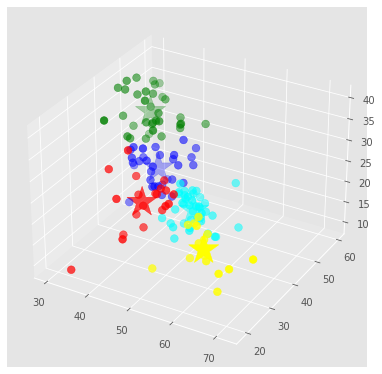

In [196]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','yellow','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Se ve que aparentemente los cluster por openness, extraversion y agreeableness no relacionan los usuarios con su profesión

A continuación entonces se grafican las proyecciones para observar de mejor manera los cluster segun cada par de las 3 variables


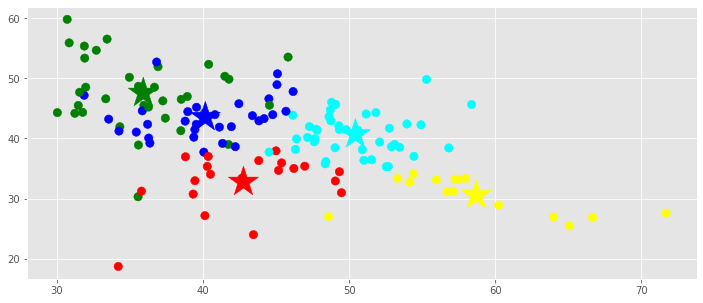

In [197]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

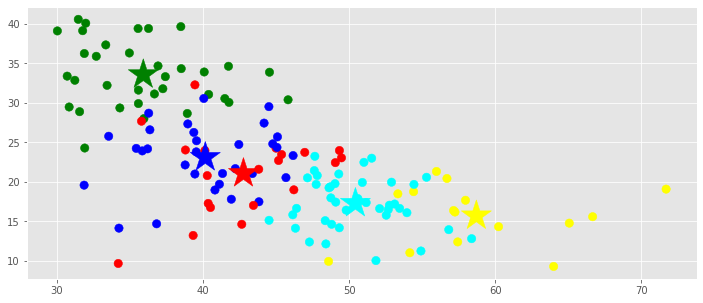

In [198]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

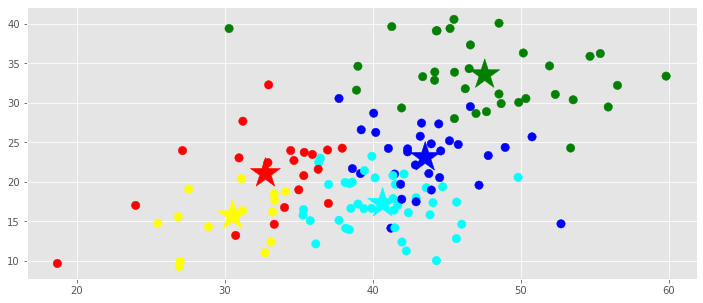

In [199]:
# Getting the values and plotting it
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

Ahora se puede ver cuantos usuarios tiene cada cluster

In [200]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,20
1,green,34
2,blue,31
3,yellow,15
4,cyan,40


Se puede ver la diferencia de profesiones en cada grupo

In [201]:
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,5.0
2,2,3.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,1.0
7,7,3.0
8,8,5.0
9,9,NaN


Se buscan entonces los usuarios mas cercanos a cada centroide de cada cluster

In [202]:
# ver el representante del grupo, el usuario cercano a su centroide
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([120,  98,  64,  82,  21], dtype=int64)

In [203]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

SarahPalinUSA
maria_patino
ierrejon
JudgeJudy
carmenelectra


## Clasificar nuevas muestras

Se prueba con nuevos datos ingresando una simulación de David Guetta con valores para cada variable, el modelo retorna a que cluster pertenece.

In [204]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[2]


## 2. Cantante          -----       Clasifica la profesión de David Guetta